In [125]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle # use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [126]:
file_path = '/Users/abhishekshah/Desktop/cybersecurity/phishing_site_urls.csv'
phishing_data = pd.read_csv(file_path,encoding='latin1')

In [127]:
phishing_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


<Axes: >

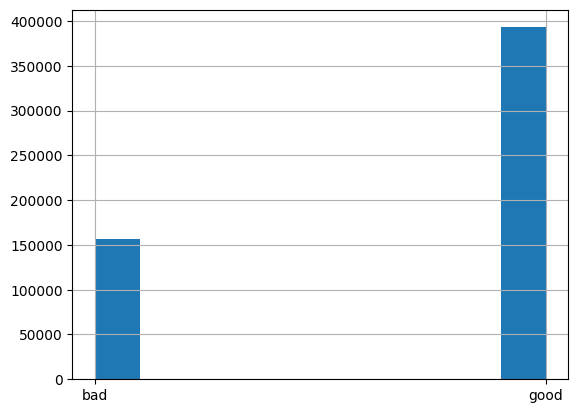

In [128]:
#checking thhe histogram of the data of label
phishing_data['Label'].hist()

In [129]:
#splits the link using the regexptokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [130]:
phishing_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [131]:
#trying to tokenize the data
tokenizer.tokenize(phishing_data.URL[0])

['nobell',
 'it',
 '70ffb52d079109dca5664cce6f317373782',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 '70ffb52d079109dca5664cce6f317373',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 '0',
 '5',
 '1',
 'login',
 'access',
 '1322408526']

In [132]:
#tokenizing the entire dataset
#start time
t0 = time.perf_counter()
phishing_data['tokens'] = phishing_data.URL.map(lambda x: tokenizer.tokenize(x))
#end time
t1 = time.perf_counter()
print(f'Time taken to tokenize the data: {t1-t0} seconds')

Time taken to tokenize the data: 1.1682274169870652 seconds


In [133]:
#taking the first 5 rows of the data
phishing_data.sample(5)

,URL,Label,tokens
332551,facebook.com/people/Robert-Maynard/734196665,good,"[facebook, com, people, Robert, Maynard, 73419..."
70920,ashleybowers.com/blog/,good,"[ashleybowers, com, blog]"
164739,dictionary.babylon.com/tiger/,good,"[dictionary, babylon, com, tiger]"
42955,top-marks.co.za/wp-content/uploads/2012/Trulia...,bad,"[top, marks, co, za, wp, content, uploads, 201..."
330789,facebook.com/pages/Tranmere-Rovers-FC/11152989...,good,"[facebook, com, pages, Tranmere, Rovers, FC, 1..."


In [134]:
#utilizing the snowball stemmer to stem the words
stemmer = SnowballStemmer("english")

In [135]:
#stemming the words
#start time
t0 = time.perf_counter()
phishing_data['stems'] = phishing_data['tokens'].map(lambda x: [stemmer.stem(y) for y in x])
#end time
t1 = time.perf_counter()
print(f'Time taken to stem the words: {t1-t0} seconds')

Time taken to stem the words: 23.36665662500309 seconds


In [136]:
#taking the first 5 rows of the data
phishing_data.sample(5)

,URL,Label,tokens,stems
535743,xnoxodgsqiv.org/apache_handler.php,bad,"[xnoxodgsqiv, org, apache, handler, php]","[xnoxodgsqiv, org, apach, handler, php]"
541948,updatesdomswins.top/data/feeder,bad,"[updatesdomswins, top, data, feeder]","[updatesdomswin, top, data, feeder]"
363457,irishgathering.ie/clan_info.asp?clanID=364&cla...,good,"[irishgathering, ie, clan, info, asp, clanID, ...","[irishgath, ie, clan, info, asp, clanid, 364, ..."
94620,www.angelfire.com/wa/castlelament/rifts.html,good,"[www, angelfire, com, wa, castlelament, rifts,...","[www, angelfir, com, wa, castlela, rift, html]"
154946,ca.linkedin.com/pub/kristin-edwards/6/446/75b,good,"[ca, linkedin, com, pub, kristin, edwards, 6, ...","[ca, linkedin, com, pub, kristin, edward, 6, 4..."


In [137]:
#joining the words
phishing_data['text_sent'] = phishing_data['stems'].map(lambda x: ' '.join(x))
phishing_data.sample(5)

,URL,Label,tokens,stems,text_sent
90808,www.centralconnector.com/GAMES/splitlevel.html,good,"[www, centralconnector, com, GAMES, splitlevel...","[www, centralconnector, com, game, splitlevel,...",www centralconnector com game splitlevel html
1335,system-administrator2.tk/,bad,"[system, administrator2, tk]","[system, administrator2, tk]",system administrator2 tk
489829,68.170.55.120/town11.pdf,bad,"[68, 170, 55, 120, town11, pdf]","[68, 170, 55, 120, town11, pdf]",68 170 55 120 town11 pdf
534649,adityastar.com/54JHbjgcDLG,bad,"[adityastar, com, 54JHbjgcDLG]","[adityastar, com, 54jhbjgcdlg]",adityastar com 54jhbjgcdlg
207695,library.usask.ca/herstory/abbott.html,good,"[library, usask, ca, herstory, abbott, html]","[librari, usask, ca, herstori, abbott, html]",librari usask ca herstori abbott html


In [138]:
#visualizing the data class
bad_sites = phishing_data[phishing_data['Label'] == 'bad']
good_sites = phishing_data[phishing_data['Label'] == 'good']

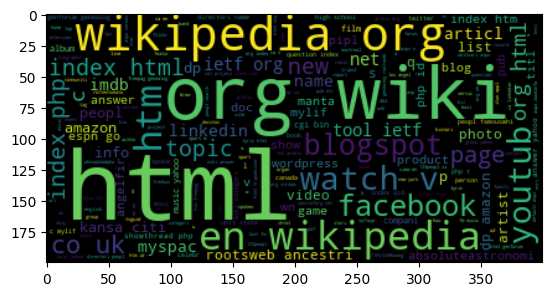

In [139]:
#visualizing the data using wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create and generate a word cloud image for good sites:
wordcloud = WordCloud().generate(' '.join(good_sites['text_sent']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')


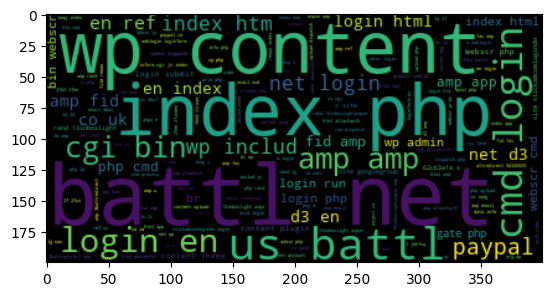

In [140]:
# Create and generate a word cloud image for bad sites:
wordcloud = WordCloud().generate(' '.join(bad_sites['text_sent']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

In [141]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud
#creating a function that will remove the stopwords from the data and crete a wordcloud
def plot_wordcloud(text,mask= None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='black',
                         stopwords=stopwords,
                         max_words=max_words,
                         max_font_size=max_font_size,
                         random_state=42,
                         width=800,
                         height=400,
                         mask=mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

In [142]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

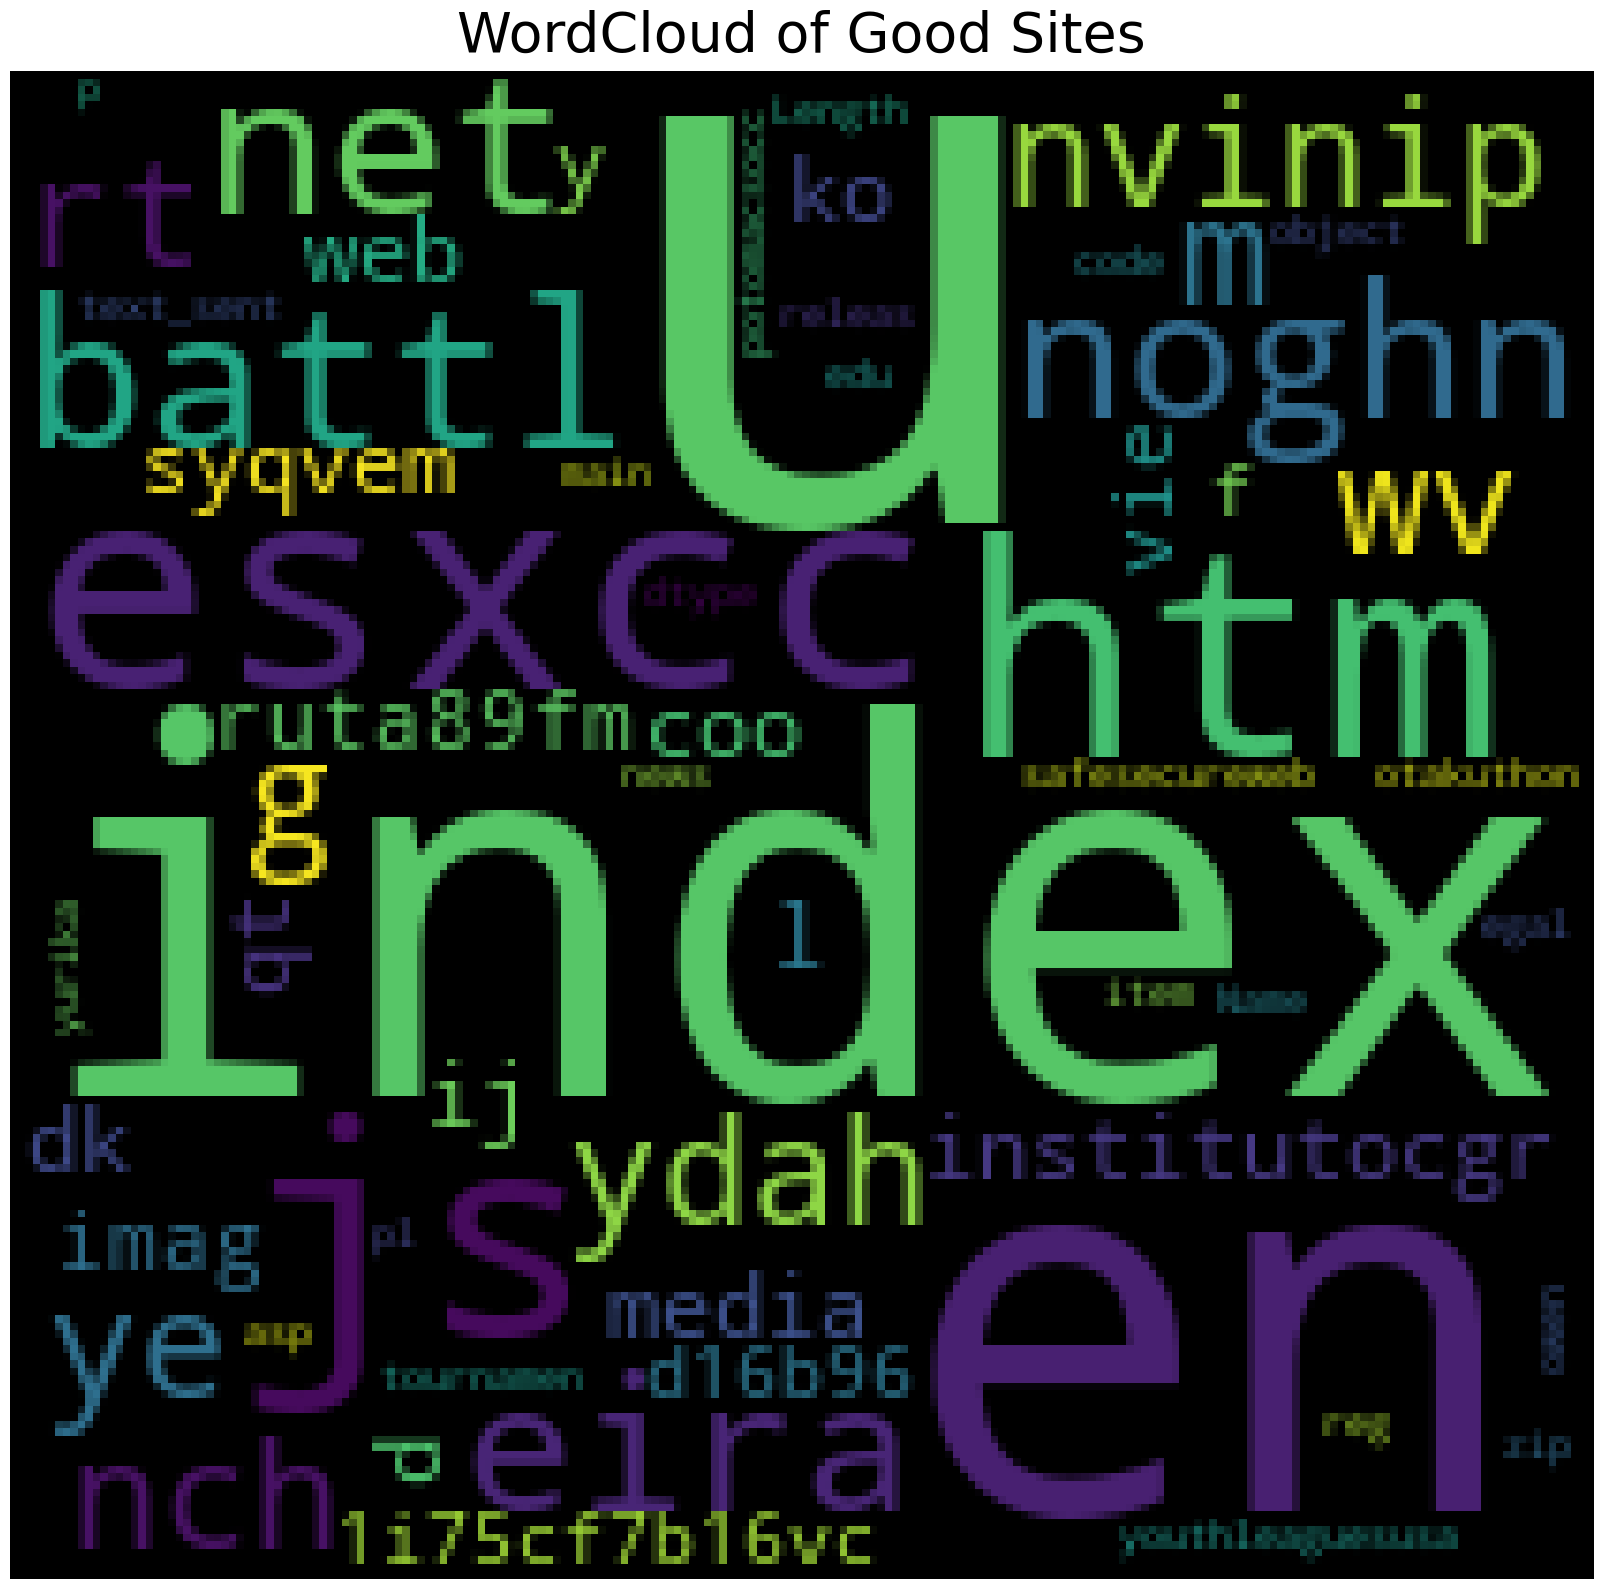

In [143]:
#plotting the wordcloud for good sites
comment_text = str(data)
common_mask = np.array(Image.open('/Users/abhishekshah/Desktop/cybersecurity/star.png'))
plot_wordcloud(comment_text, common_mask, max_words=400, max_font_size=100, title = 'WordCloud of Good Sites')

In [144]:
bad = bad_sites.text_sent
bad.reset_index(drop=True, inplace=True)

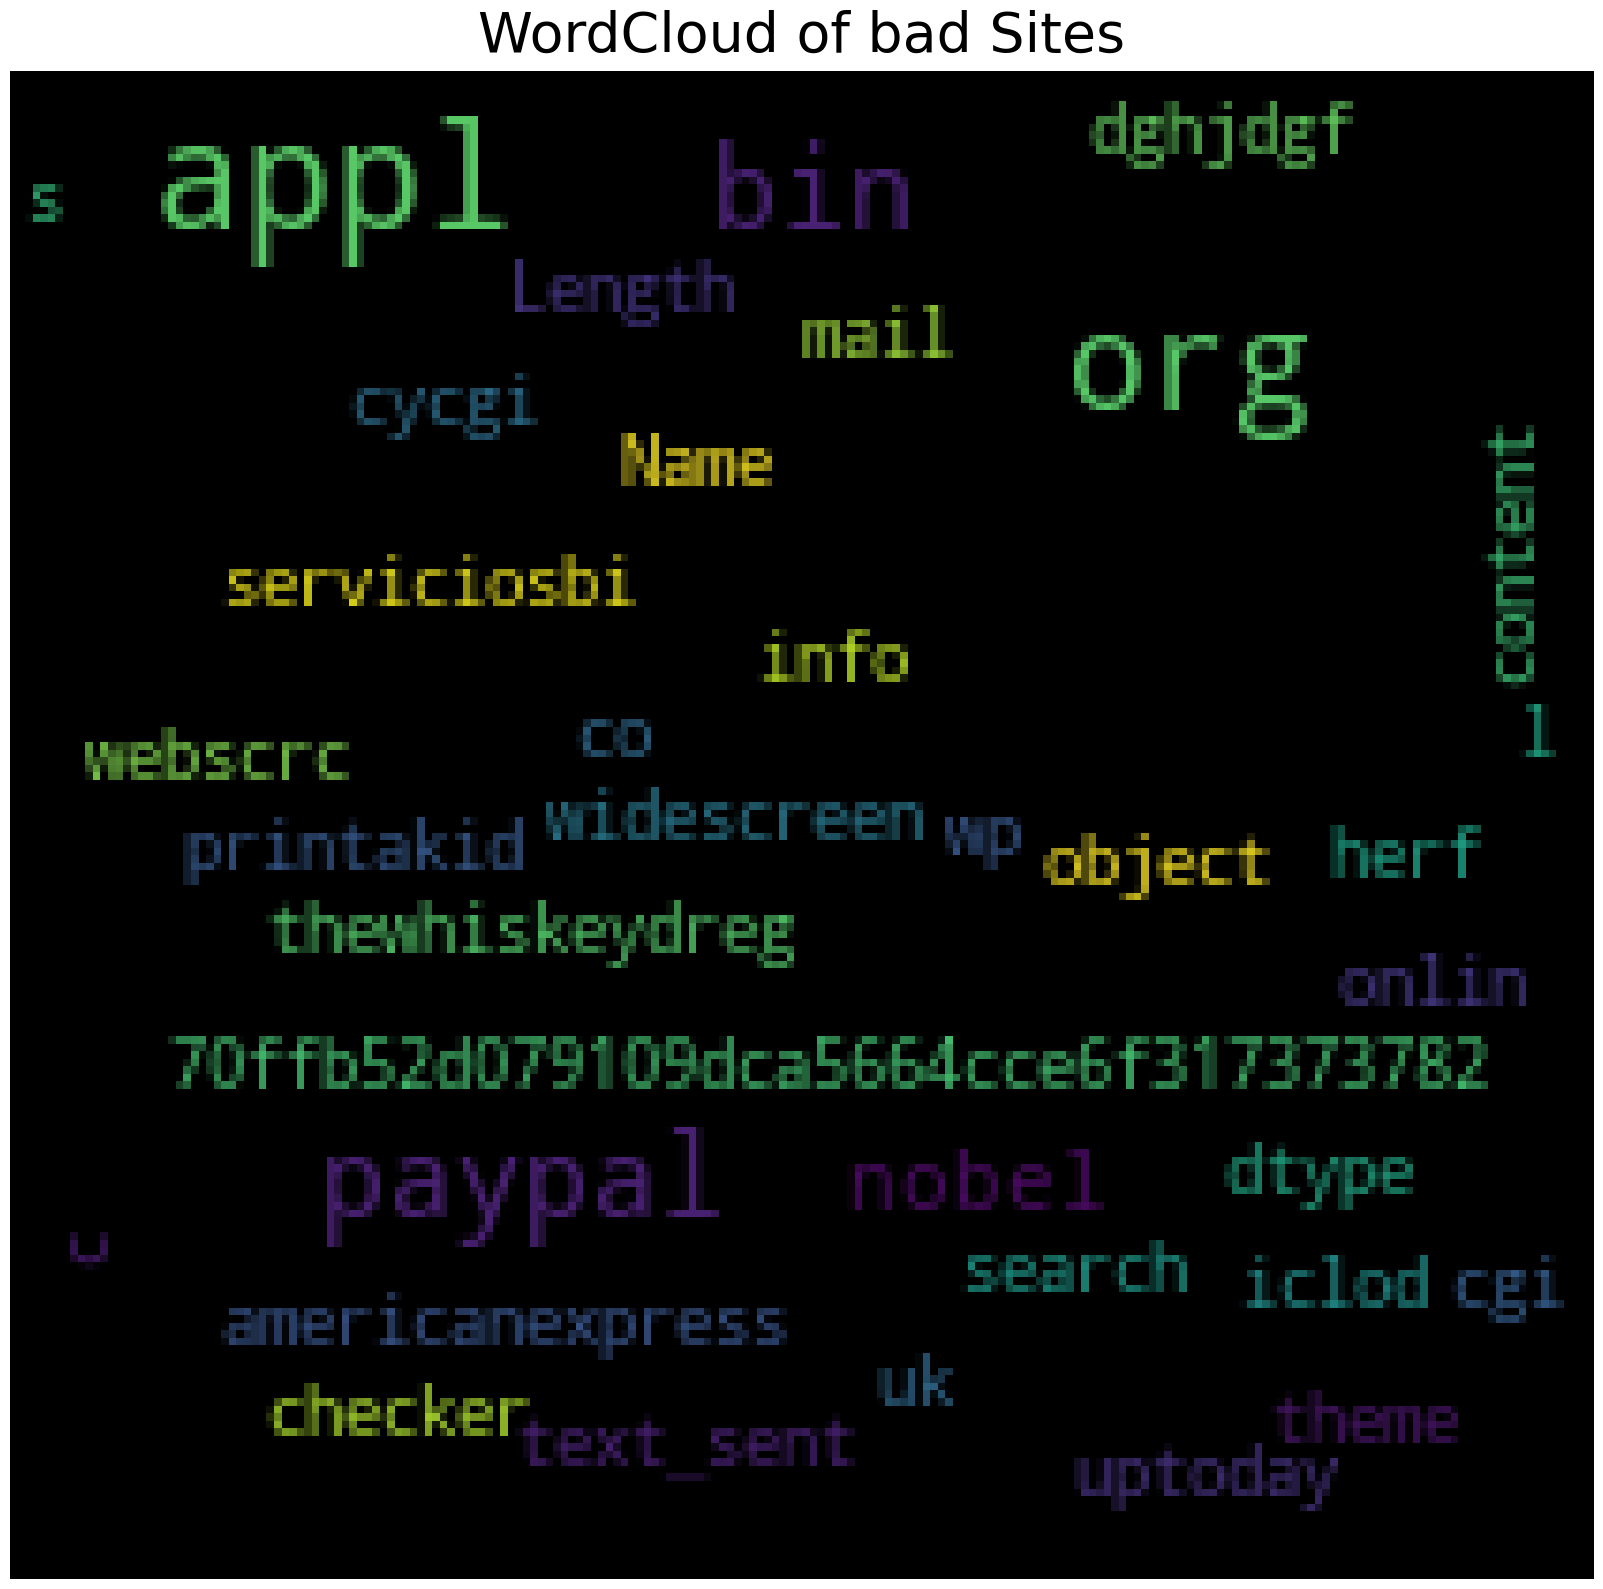

In [145]:
#plotting the wordcloud for bad sites
comment_text = str(bad)
common_mask = np.array(Image.open('/Users/abhishekshah/Desktop/cybersecurity/star.png'))
plot_wordcloud(comment_text, common_mask, max_words=400, max_font_size=20, title = 'WordCloud of bad Sites')

CountVectorizer
CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [147]:
#creating a count vectorizer
cv= CountVectorizer()

In [148]:
#transforming the data which we have tokenized and stemmed
feature = cv.fit_transform(phishing_data['text_sent'])

In [149]:
#creating a sparse matrix into array to preview the data
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [150]:
#splitting the data into feature and target
X_train, X_test, y_train, y_test = train_test_split(feature, phishing_data['Label'], test_size=0.3, random_state=42)

In [192]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

#save the training data as a vectorized file to be used later
pickle.dump(cv, open('cv.pkl', 'wb'))



In [152]:
#using logistic regression to predict the data
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

#get the score
log_model.score(X_test, y_test).round(2)

0.96

In [153]:
#getting the training and testing accuracy
print('Training Accuracy: ', log_model.score(X_train, y_train).round(2))
print('Testing Accuracy: ', log_model.score(X_test, y_test).round(2))

Training Accuracy:  0.98
Testing Accuracy:  0.96


In [156]:
#create a ddataframe of the classification report with columns as index
log_class = classification_report(y_test, log_pred, output_dict=True)

log_class_df = pd.DataFrame(log_class).T

log_class_df

,precision,recall,f1-score,support
bad,0.971478,0.897583,0.933069,46750.000000
good,0.960628,0.989564,0.974882,118054.000000
accuracy,0.963472,0.963472,0.963472,0.963472
macro avg,0.966053,0.943573,0.953975,164804.000000
weighted avg,0.963706,0.963472,0.963021,164804.000000


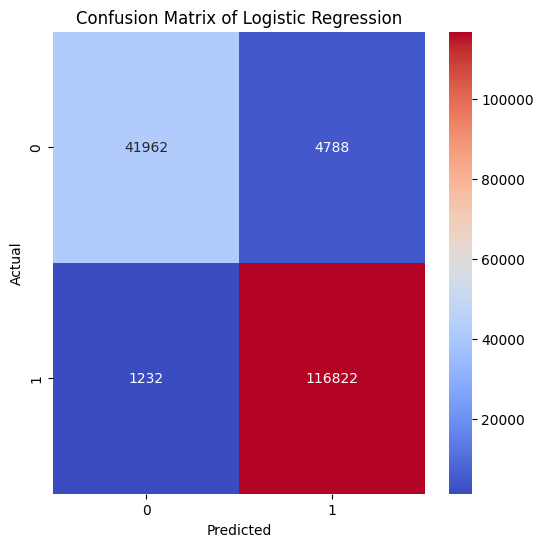

In [164]:
#plot the confusion matrix with actual and predicted data with labels 
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [159]:
#using multinomial naive bayes to predict the data
nb_model = MultinomialNB()

In [160]:
#fit the data
nb_model.fit(X_train, y_train)

MultinomialNB()

In [161]:
#predict the data
nb_pred = nb_model.predict(X_test)

#get the score
nb_model.score(X_test, y_test).round(2)

0.96

In [162]:
#getting the training and testing accuracy
print('Training Accuracy: ', nb_model.score(X_train, y_train).round(2))
print('Testing Accuracy: ', nb_model.score(X_test, y_test).round(2))

Training Accuracy:  0.98
Testing Accuracy:  0.96


In [163]:
#create a ddataframe of the classification report with columns as index
nb_class = classification_report(y_test, nb_pred, output_dict=True)

nb_class_df = pd.DataFrame(nb_class).T

nb_class_df

,precision,recall,f1-score,support
bad,0.932066,0.929455,0.930759,46750.000000
good,0.972095,0.973173,0.972634,118054.000000
accuracy,0.960772,0.960772,0.960772,0.960772
macro avg,0.952080,0.951314,0.951696,164804.000000
weighted avg,0.960740,0.960772,0.960755,164804.000000


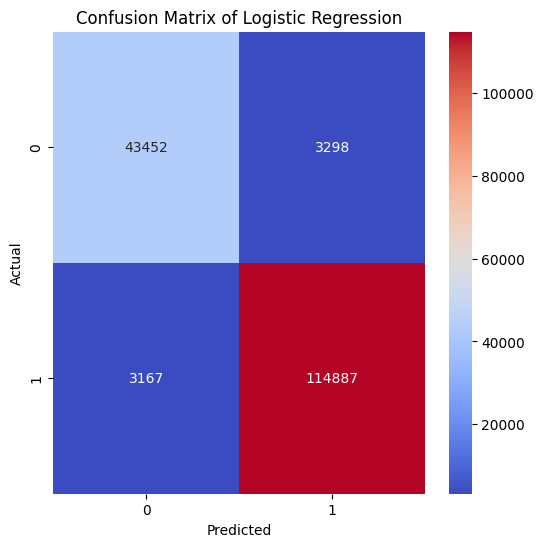

In [165]:
#plot the confusion matrix with actual and predicted data with labels
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [176]:
#compare the two models and put them in a dataframe by accuracy and classification report precision and recall
models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracy = [log_model.score(X_test, y_test), nb_model.score(X_test, y_test)]
classification = [log_class, nb_class]

model_compare = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Classification Report': classification})

model_compare.head()

,Model,Accuracy,Classification Report
0,Logistic Regression,0.963472,"{'bad': {'precision': 0.9714775200259296, 'rec..."
1,Multinomial Naive Bayes,0.960772,"{'bad': {'precision': 0.9320663248889938, 'rec..."


In [177]:
#dump the model
pickle.dump(log_model, open('phishing_model.pkl', 'wb'))

In [182]:
#load some of the bad sites to check if the model is working randomly
test = bad_sites.sample(5)

In [193]:
#turn this notebook into a python script
!jupyter nbconvert --to script prediction.ipynb

[NbConvertApp] Converting notebook prediction.ipynb to script
[NbConvertApp] Writing 9798 bytes to prediction.py


In [183]:
#testing the model
loaded_model = pickle.load(open('phishing_model.pkl', 'rb'))

#predict the data
test['prediction'] = loaded_model.predict(cv.transform(test['text_sent']))

In [184]:
#show the data
test[['URL', 'Label', 'prediction']]

,URL,Label,prediction
498165,dlltqfjd.pl/upload/_dispatch.php,bad,bad
35817,200-98-68-44.clouduol.com.br/modulo/index.php,bad,bad
114303,norcaind.com/tmp/kevo/hash/login.php?email=abu...,bad,bad
530422,myphychoice.com/qz3eppp,bad,bad
489396,6i3cb6owitcouepv.mywa2pay.com/img/flags/it.png,bad,bad


In [189]:
#give me 5 random bad sites URL in a dictionary
bad_sites['URL'].sample(5).to_dict()

{510922: 'crazyindiya.com/t76f3g',
 124137: 'tomatostitch.com/bbs/data/images/cn.htm/',
 514298: 'jianhu365.com/z9puqdj2eu',
 516899: 'ib.adnxs.com/tt?id=2508725&size=728x90&rand=0.8053932205189724',
 36620: 'teszona.co.uk/Commbank.com.au/Logon.aspx.htm'}